### E1

### Color NPHI-Depth plot based on GR range using any python visualization library
#### Data:Log Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
log_data = pd.read_csv( 'C:\\Users\\Home\\Documents\\Complete-Python-3-Bootcamp-master\\basic_course\\Lecture_3\\data\\log_data_csv.csv') # load csv file. Different formats can be imported in pandas using pd.read_
log_data = log_data[['DEPTH','GR','BS','CALI','NPHI','RHOB','DT','DTS','ROP']]

In [3]:
log_data

,DEPTH,GR,BS,CALI,NPHI,RHOB,DT,DTS,ROP
0,145.9,NaN,36.0,NaN,NaN,NaN,NaN,NaN,NaN
1,146.0,NaN,36.0,NaN,NaN,NaN,NaN,NaN,NaN
2,146.1,NaN,36.0,NaN,NaN,NaN,NaN,NaN,NaN
3,146.2,NaN,36.0,NaN,NaN,NaN,NaN,NaN,NaN
4,146.3,NaN,36.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
33186,3464.5,NaN,8.5,NaN,NaN,NaN,NaN,NaN,29.9836
33187,3464.6,NaN,8.5,NaN,NaN,NaN,NaN,NaN,29.9767
33188,3464.7,NaN,8.5,NaN,NaN,NaN,NaN,NaN,29.9699
33189,3464.8,NaN,8.5,NaN,NaN,NaN,NaN,NaN,29.9903


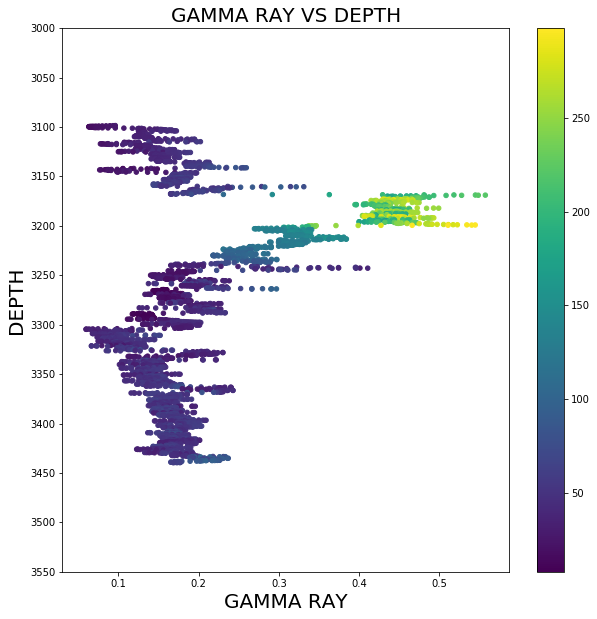

In [4]:
plt.figure(figsize=(10,10))
plt.scatter(y=log_data['DEPTH'],x=log_data['NPHI'],s=20,c=log_data['GR']) # c= any parameter we can show to show the colour variations
plt.title('GAMMA RAY VS DEPTH',fontsize=20)
plt.xlabel('GAMMA RAY',fontsize=20)
plt.ylabel('DEPTH',fontsize=20)
plt.yticks(np.arange(3000,3600,step=50))
plt.gca().invert_yaxis()
plt.colorbar()

### E2

### Create a new column in log data called 'lithology' based on Gamma Ray range. More than 75 - Shale. Less thna 75 - Sandstone. Keep in mind these range is just for learning purpose. This rule doesnt apply everytime.  
### Assign values 'SANDSTONE' and 'SHALE' based on the above mentioned Gamma-Ray Range

### Create Scatter Plot of Neutron Density color coded by litholy column (categorical color plot)

### Solution 3
Using Plotly Graph objects. 

In [6]:
log_data['lithology']=np.where(log_data['GR']>75,'Shale','Sandstone')
log_data

,DEPTH,GR,BS,CALI,NPHI,RHOB,DT,DTS,ROP,lithology
0,145.9,NaN,36.0,NaN,NaN,NaN,NaN,NaN,NaN,Sandstone
1,146.0,NaN,36.0,NaN,NaN,NaN,NaN,NaN,NaN,Sandstone
2,146.1,NaN,36.0,NaN,NaN,NaN,NaN,NaN,NaN,Sandstone
3,146.2,NaN,36.0,NaN,NaN,NaN,NaN,NaN,NaN,Sandstone
4,146.3,NaN,36.0,NaN,NaN,NaN,NaN,NaN,NaN,Sandstone
...,...,...,...,...,...,...,...,...,...,...
33186,3464.5,NaN,8.5,NaN,NaN,NaN,NaN,NaN,29.9836,Sandstone
33187,3464.6,NaN,8.5,NaN,NaN,NaN,NaN,NaN,29.9767,Sandstone
33188,3464.7,NaN,8.5,NaN,NaN,NaN,NaN,NaN,29.9699,Sandstone
33189,3464.8,NaN,8.5,NaN,NaN,NaN,NaN,NaN,29.9903,Sandstone


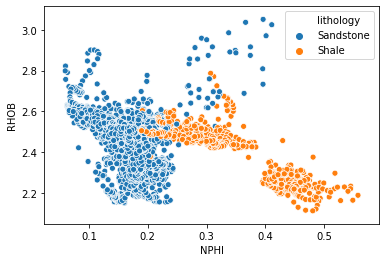

In [8]:
import seaborn as sns
sns.scatterplot(x=log_data['NPHI'],y=log_data['RHOB'],hue=log_data['lithology'])

### E3

### Create a Cateogrical Scatter Plot and Categorical Box Plot using Seaborn Library based on lithology and different properties like GR; RHOB on y axis. 

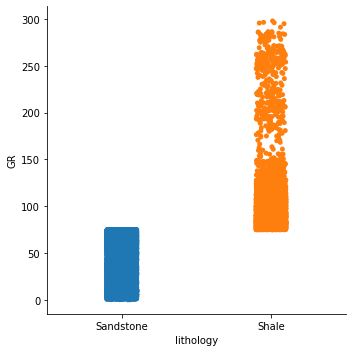

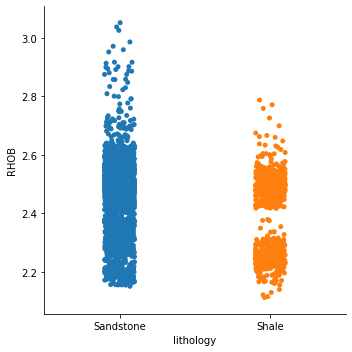

In [11]:
sns.catplot(x='lithology',y='GR',data=log_data)
sns.catplot(x='lithology',y='RHOB',data=log_data)

### E4

### Create a Box plot using Seaborn Library based on lithology and different properties like GR; RHOB on y axis.

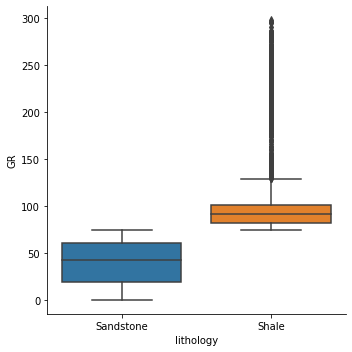

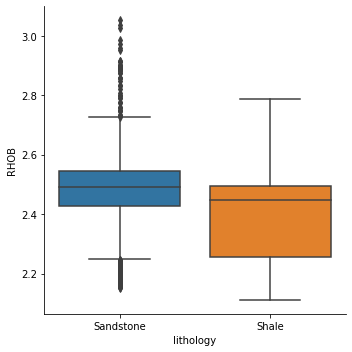

In [12]:
sns.catplot(x='lithology',y='GR',data=log_data,kind='box')
sns.catplot(x='lithology',y='RHOB',data=log_data,kind='box')

### E5

### Create histogram of ROP values based on categorical data of lithology column using plotly library in one figure (Use different bin size between 20-50)

Trick: Use for loop

In [9]:
import plotly.graph_objects as go
fig = go.Figure(layout=go.Layout(title=go.layout.Title(text="Histogram of ROP vs lithologies"),
                xaxis=dict(title="ROP Values"),
                width = 600,
                height = 600))

for lithology_value in log_data['lithology'].unique():
    
    fig.add_trace(go.Histogram(x=log_data['ROP'][log_data['lithology'] == lithology_value],name = lithology_value, xbins=dict(size=20))) 

fig.show()

### E6

### Import the Production Data and plot Average Choke Size and Average Annulus pressure proerties wrt time in the same plot.

In [10]:
production_data = pd.read_csv('C:\\Users\\Home\\Documents\\Complete-Python-3-Bootcamp-master\\basic_course\\Lecture_3\\data\\prod_data.csv')
production_data

,Unnamed: 0,DATEPRD,AVG_DOWNHOLE_PRESSURE,AVG_DOWNHOLE_TEMPERATURE,AVG_DP_TUBING,AVG_ANNULUS_PRESS,AVG_CHOKE_SIZE_P,AVG_CHOKE_UOM,AVG_WHP_P,AVG_WHT_P,DP_CHOKE_SIZE,BORE_OIL_VOL,BORE_GAS_VOL,BORE_WAT_VOL,BORE_WI_VOL,FLOW_KIND,WELL_TYPE
0,0,2014-04-07,0.00000,0.00000,0.00000,0.00000,0.000000,%,0.00000,0.00000,0.00000,0.0,0.0,0.0,NaN,production,WI
1,1,2014-04-08,NaN,NaN,NaN,0.00000,1.003059,%,0.00000,0.00000,0.00000,0.0,0.0,0.0,NaN,production,OP
2,2,2014-04-09,NaN,NaN,NaN,0.00000,0.979008,%,0.00000,0.00000,0.00000,0.0,0.0,0.0,NaN,production,OP
3,3,2014-04-10,NaN,NaN,NaN,0.00000,0.545759,%,0.00000,0.00000,0.00000,0.0,0.0,0.0,NaN,production,OP
4,4,2014-04-11,310.37614,96.87589,277.27826,0.00000,1.215987,%,33.09788,10.47992,33.07195,0.0,0.0,0.0,NaN,production,OP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15629,15629,2016-09-14,NaN,NaN,NaN,0.27272,0.636088,%,0.07776,0.22879,0.01862,0.0,0.0,0.0,NaN,production,OP
15630,15630,2016-09-15,NaN,NaN,NaN,0.28686,0.670794,%,0.08545,0.22914,0.00631,0.0,0.0,0.0,NaN,production,OP
15631,15631,2016-09-16,NaN,NaN,NaN,0.28604,0.664393,%,0.08544,0.22896,0.01181,0.0,0.0,0.0,NaN,production,OP
15632,15632,2016-09-17,NaN,NaN,NaN,0.27212,0.624660,%,0.07497,0.22846,0.02576,0.0,0.0,0.0,NaN,production,OP


In [11]:
production_data['DATEPRD']=pd.to_datetime(production_data['DATEPRD'])
production_data['YEAR']=production_data['DATEPRD'].dt.year

In [12]:
fig = go.Figure(layout=go.Layout(title=go.layout.Title(text="Time Series Data"),
                width = 700,
                height = 700))

fig.add_scatter(x=production_data.sort_values(by='DATEPRD')['DATEPRD'], y=production_data.sort_values(by='DATEPRD')['AVG_ANNULUS_PRESS'], name = 'Average Annulus Pressure')

fig.add_scatter(x=production_data.sort_values(by='DATEPRD')['DATEPRD'], y=production_data.sort_values(by='DATEPRD')['AVG_CHOKE_SIZE_P'], name = 'Average Choke Size')

fig.show()